<a href="https://colab.research.google.com/github/iclalseymakoca/Earthquakes/blob/main/Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the data set, there are earthquake data that took place in the end of 2022 and at the beginning of 2023. In this data set, earthquakes with a magnitude of 7 and above were examined.



# **Adding libraries**



In [1]:
import pandas as pd 
import numpy as np
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

# **Reading Files and Viewing Their Contents**

In [6]:
df=pd.read_csv("/content/query (1).csv")

In [7]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-14T11:14:15.482Z,60.951500,-150.904100,14.70,2.70,ml,NaN,NaN,NaN,0.51,...,2023-03-14T11:15:52.276Z,NaN,earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
1,2023-03-14T10:45:45.290Z,37.518166,-117.976669,0.80,2.80,ml,20.0,116.0,0.3767,0.20,...,2023-03-14T10:53:12.211Z,"16km N of Deep Springs, CA",earthquake,0.47,15.100,0.174,10.0,automatic,nc,nc
2,2023-03-14T10:13:19.500Z,37.526833,-117.981331,8.03,3.88,mw,35.0,116.0,0.3810,0.29,...,2023-03-14T11:33:08.121Z,"17km N of Deep Springs, CA",earthquake,0.73,2.100,NaN,3.0,reviewed,nc,nc
3,2023-03-14T10:01:15.052Z,51.744900,159.540700,10.00,5.00,mb,98.0,125.0,1.3920,0.68,...,2023-03-14T10:26:34.040Z,"153 km SSE of Vilyuchinsk, Russia",earthquake,8.69,1.872,0.051,123.0,reviewed,us,us
4,2023-03-14T09:57:35.610Z,37.522167,-117.977837,0.63,2.81,md,12.0,165.0,0.3792,0.12,...,2023-03-14T10:04:13.931Z,"17km N of Deep Springs, CA",earthquake,0.47,10.280,0.130,12.0,automatic,nc,nc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18266 entries, 0 to 18265
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             18266 non-null  object 
 1   latitude         18266 non-null  float64
 2   longitude        18266 non-null  float64
 3   depth            18266 non-null  float64
 4   mag              18266 non-null  float64
 5   magType          18266 non-null  object 
 6   nst              17075 non-null  float64
 7   gap              17073 non-null  float64
 8   dmin             15957 non-null  float64
 9   rms              18265 non-null  float64
 10  net              18266 non-null  object 
 11  id               18266 non-null  object 
 12  updated          18266 non-null  object 
 13  place            17288 non-null  object 
 14  type             18266 non-null  object 
 15  horizontalError  16917 non-null  float64
 16  depthError       18265 non-null  float64
 17  magError    

In [10]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [11]:
data = df[[ "time", "latitude","longitude","mag", "depth", "place"]]

In [12]:
data.head()

,time,latitude,longitude,mag,depth,place
0,2023-03-14T11:14:15.482Z,60.951500,-150.904100,2.70,14.70,NaN
1,2023-03-14T10:45:45.290Z,37.518166,-117.976669,2.80,0.80,"16km N of Deep Springs, CA"
2,2023-03-14T10:13:19.500Z,37.526833,-117.981331,3.88,8.03,"17km N of Deep Springs, CA"
3,2023-03-14T10:01:15.052Z,51.744900,159.540700,5.00,10.00,"153 km SSE of Vilyuchinsk, Russia"
4,2023-03-14T09:57:35.610Z,37.522167,-117.977837,2.81,0.63,"17km N of Deep Springs, CA"


In [13]:
data.place

0                                                     NaN
1                              16km N of Deep Springs, CA
2                              17km N of Deep Springs, CA
3                       153 km SSE of Vilyuchinsk, Russia
4                              17km N of Deep Springs, CA
                               ...                       
18261    4 km ENE of Tierras Nuevas Poniente, Puerto Rico
18262                         south of Sumbawa, Indonesia
18263                      10km NNE of Ocotillo Wells, CA
18264                      198 km SE of Port Blair, India
18265                        210 km SSE of Akutan, Alaska
Name: place, Length: 18266, dtype: object

In [14]:
data_old = data.copy()
data['time'] = pd.to_datetime(data['time'], errors='coerce', utc = True)

data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

data.head(-5)

,time,latitude,longitude,mag,depth,place,year,month,day
0,2023-03-14 11:14:15.482000+00:00,60.951500,-150.904100,2.70,14.70,NaN,2023,3,14
1,2023-03-14 10:45:45.290000+00:00,37.518166,-117.976669,2.80,0.80,"16km N of Deep Springs, CA",2023,3,14
2,2023-03-14 10:13:19.500000+00:00,37.526833,-117.981331,3.88,8.03,"17km N of Deep Springs, CA",2023,3,14
3,2023-03-14 10:01:15.052000+00:00,51.744900,159.540700,5.00,10.00,"153 km SSE of Vilyuchinsk, Russia",2023,3,14
4,2023-03-14 09:57:35.610000+00:00,37.522167,-117.977837,2.81,0.63,"17km N of Deep Springs, CA",2023,3,14
...,...,...,...,...,...,...,...,...,...
18256,2022-07-07 03:19:48.570000+00:00,17.941000,-66.845100,3.26,10.00,"6 km SE of Maria Antonia, Puerto Rico",2022,7,7
18257,2022-07-07 03:08:46.250000+00:00,18.849000,-68.352000,3.41,50.94,"30 km N of Punta Cana, Dominican Republic",2022,7,7
18258,2022-07-07 03:00:24.220000+00:00,38.622667,-119.822667,2.51,1.83,"8km SSW of Markleeville, CA",2022,7,7
18259,2022-07-07 02:35:06.951000+00:00,-17.784800,-177.573300,4.30,558.09,NaN,2022,7,7


In [15]:
data.drop(['time'], axis = 1, inplace = True)
data.describe()

,latitude,longitude,mag,depth,year,month,day
count,18266.000000,18266.000000,18266.000000,18266.000000,18266.000000,18266.000000,18266.000000
mean,19.351197,-31.233580,3.855904,62.537455,2022.285339,7.308935,15.768860
std,30.260161,125.035342,0.864414,112.460517,0.451588,3.826483,8.797046
min,-65.407100,-179.997600,2.500000,-3.740000,2022.000000,1.000000,1.000000
25%,-5.548425,-155.137333,2.980000,10.000000,2022.000000,3.000000,8.000000
50%,19.379150,-67.079550,4.200000,17.438000,2022.000000,8.000000,16.000000
75%,44.989575,120.316925,4.500000,58.596750,2023.000000,10.000000,23.000000
max,86.154600,179.996000,7.800000,660.000000,2023.000000,12.000000,31.000000


<Axes: >

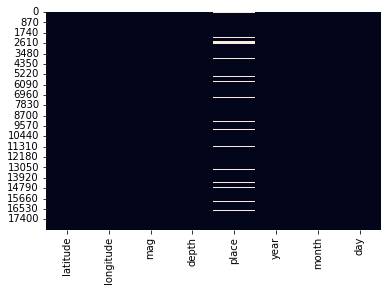

In [21]:
sns.heatmap(data.isnull(), cbar=False)

# **EDA**

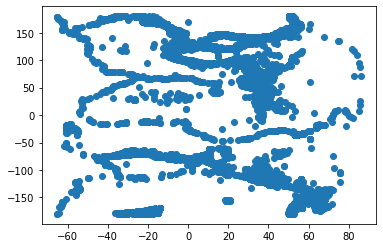

In [17]:
plt.scatter(x = 'latitude', y = 'longitude', data= data)
plt.show()

<Figure size 432x288 with 0 Axes>

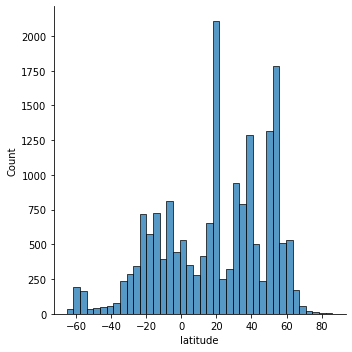

<Figure size 432x288 with 0 Axes>

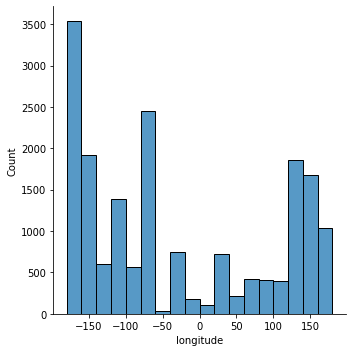

<Figure size 432x288 with 0 Axes>

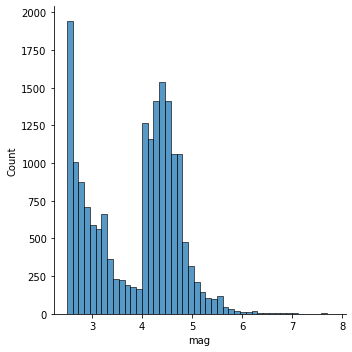

<Figure size 432x288 with 0 Axes>

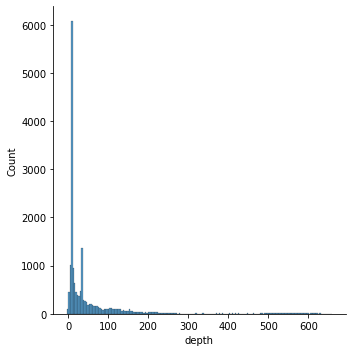

<Figure size 432x288 with 0 Axes>

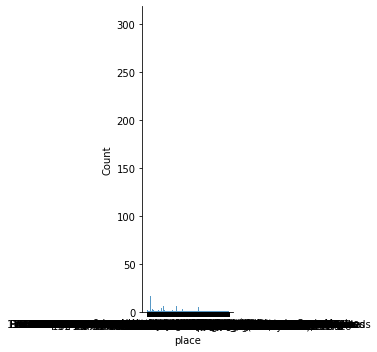

<Figure size 432x288 with 0 Axes>

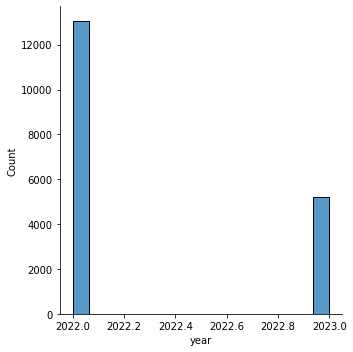

<Figure size 432x288 with 0 Axes>

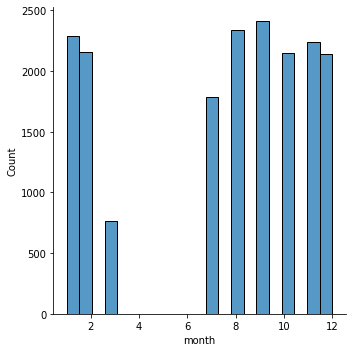

<Figure size 432x288 with 0 Axes>

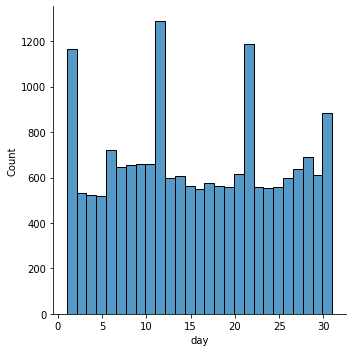

In [18]:
import seaborn as sns
for each in data.columns:
    plt.figure(each)
    sns.displot(data, x = each)
    plt.show()

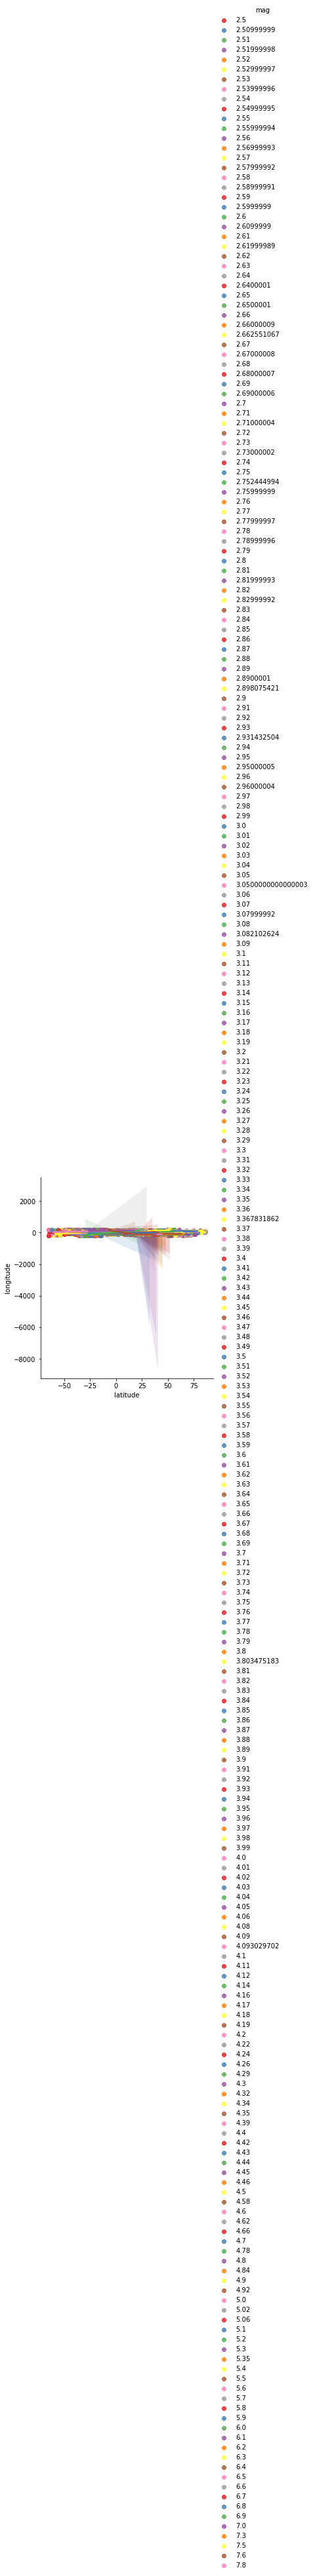

In [19]:
sns.lmplot(x="latitude", y="longitude", hue="mag", data=data,
           palette="Set1");

In [ ]:
df_7 = data[data['mag'] > 6.99]
df_7.head()

,latitude,longitude,mag,depth,year,month,day
2462,38.0155,37.2056,7.5,14.962,2023,2,6
2588,37.2199,37.0189,7.8,10.000,2023,2,6
3982,2.7357,127.0274,7.0,28.855,2023,1,18
4571,-7.0645,130.0046,7.6,105.200,2023,1,9
4664,-14.9464,166.8808,7.0,29.000,2023,1,8


In [ ]:
df_7.reset_index(drop = True, inplace = True)
df_7.tail()

,latitude,longitude,mag,depth,year,month,day
8,-26.0901,178.3427,7.0,660.000,2022,11,9
9,18.4552,-102.9561,7.6,26.943,2022,9,19
10,-21.1909,170.2666,7.0,137.000,2022,9,14
11,-6.2944,146.5038,7.6,116.000,2022,9,10
12,17.5207,120.8181,7.0,33.729,2022,7,27


In [ ]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   13 non-null     float64
 1   longitude  13 non-null     float64
 2   mag        13 non-null     float64
 3   depth      13 non-null     float64
 4   year       13 non-null     int64  
 5   month      13 non-null     int64  
 6   day        13 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 856.0 bytes


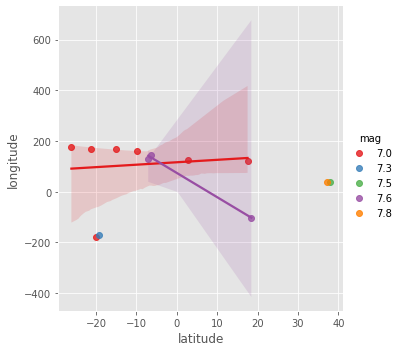

In [ ]:
sns.lmplot(x="latitude", y="longitude", hue="mag", data=df_7,
           palette="Set1");

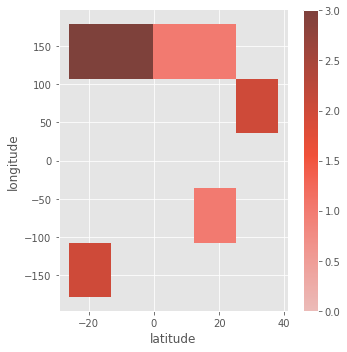

In [ ]:
sns.displot(df_7, x = 'latitude', y = 'longitude', cbar=True)

In [ ]:
threshold = df_7['mag'] < 7.5
threshold

0     False
1     False
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9     False
10     True
11    False
12     True
Name: mag, dtype: bool

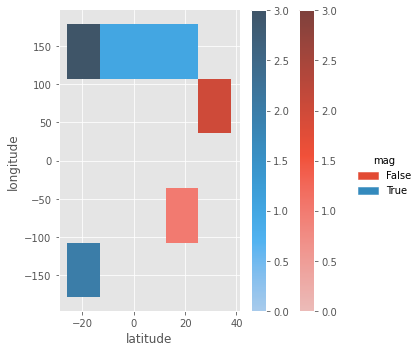

In [ ]:
sns.displot(df_7, x = 'latitude', y = 'longitude', hue = threshold, cbar=True)


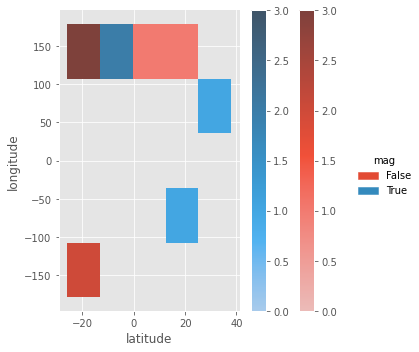

In [ ]:
threshold = df_7['mag'] > 7.5
sns.displot(df_7, x = 'latitude', y = 'longitude', hue = threshold, cbar=True)


In [ ]:
df_7[['latitude', 'longitude', 'mag']].describe()

,latitude,longitude,mag
count,13.000000,13.000000,13.000000
mean,-0.835262,63.094100,7.261538
std,21.969812,131.104861,0.312353
min,-26.090100,-178.345300,7.000000
25%,-19.288100,37.018900,7.000000
50%,-7.064500,127.027400,7.000000
75%,17.520700,159.603300,7.600000
max,38.015500,178.342700,7.800000


In [ ]:
df_dense = df_7[(df_7['longitude'] > 150) & df_7['latitude'].between(-25,0)]
df_dense.head(10)


,latitude,longitude,mag,depth,year,month,day
4,-14.9464,166.8808,7.0,29.0,2023,1,8
5,-9.8198,159.6033,7.0,14.0,2022,11,22
10,-21.1909,170.2666,7.0,137.0,2022,9,14


In [ ]:
df_dense.describe()

,latitude,longitude,mag,depth,year,month,day
count,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000
mean,-15.319033,165.583567,7.0,60.000000,2022.333333,7.000000,14.666667
std,5.694701,5.448725,0.0,67.104396,0.577350,5.291503,7.023769
min,-21.190900,159.603300,7.0,14.000000,2022.000000,1.000000,8.000000
25%,-18.068650,163.242050,7.0,21.500000,2022.000000,5.000000,11.000000
50%,-14.946400,166.880800,7.0,29.000000,2022.000000,9.000000,14.000000
75%,-12.383100,168.573700,7.0,83.000000,2022.500000,10.000000,18.000000
max,-9.819800,170.266600,7.0,137.000000,2023.000000,11.000000,22.000000


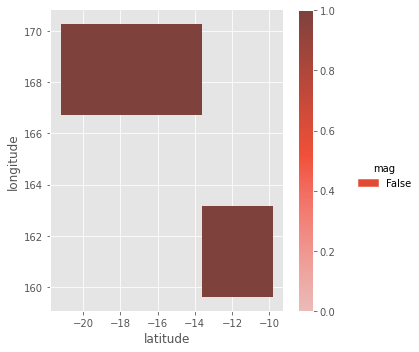

In [ ]:
threshold = df_dense['mag'] > 7.5
sns.displot(df_dense, x = 'latitude', y = 'longitude', hue = threshold, cbar= True)


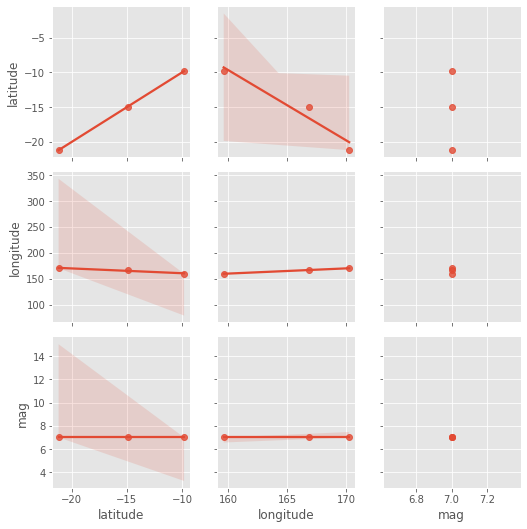

In [ ]:
g = sns.PairGrid(data = df_dense[['latitude', 'longitude', 'mag']])
g.map(sns.regplot)


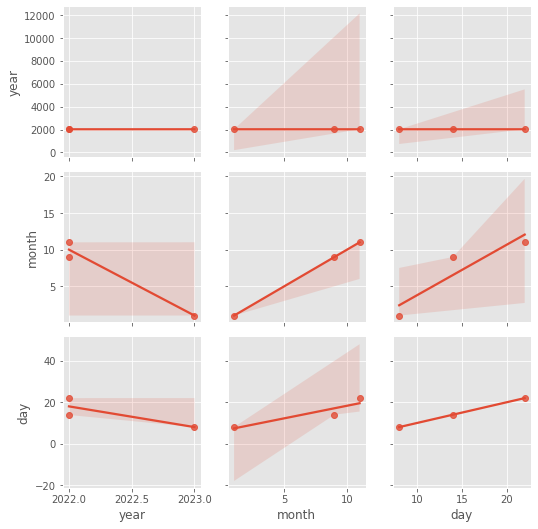

In [ ]:
g = sns.PairGrid(data = df_dense[['year', 'month', 'day']])
g.map(sns.regplot)


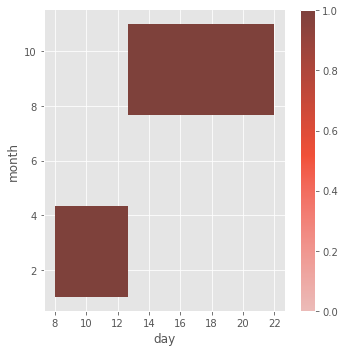

In [ ]:
sns.displot(df_dense, x = 'day', y = 'month', cbar = True)


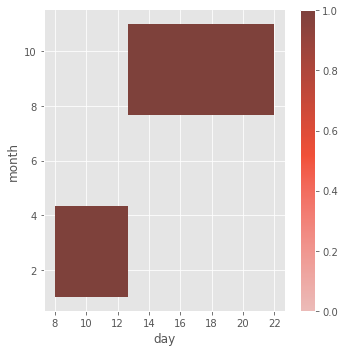

In [ ]:
sns.displot(df_dense, x = 'day', y = 'month', cbar = True)


<Figure size 432x288 with 0 Axes>

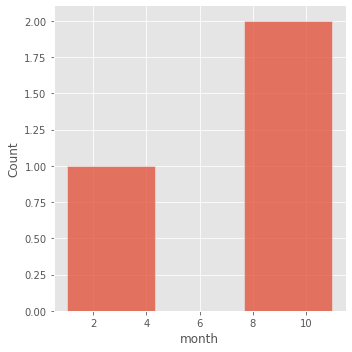

<Figure size 432x288 with 0 Axes>

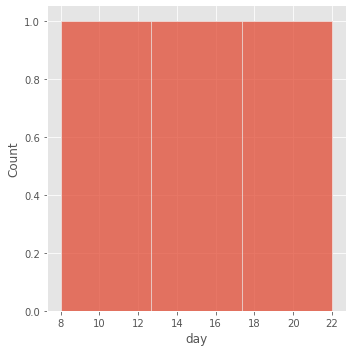

<Figure size 432x288 with 0 Axes>

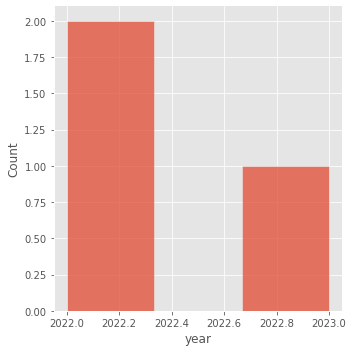

In [ ]:
list_g = ['month', 'day', 'year']
for each in list_g:
    plt.figure(each)
    sns.displot(df_dense, x = each)
    plt.show()